<a href="https://colab.research.google.com/github/wakamoia/tareitas-clase-IA-y-RN/blob/main/Proyecto_Final_Equipo6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import datasets, layers, models, Sequential
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

from google.colab import files
import zipfile 
import io
import os 

import cv2


In [ ]:
train_images = tf.keras.utils.image_dataset_from_directory('/content/scans/Data/train',
                                                       validation_split=0.2, #aggregar 20% de los datos de las imagenes de entrenamiento
                                                       subset="training",
                                                       seed=123, #Inicia repetibilidad
                                                       image_size=(500,500))

Found 613 files belonging to 4 classes.
Using 491 files for training.


In [ ]:
test_images = tf.keras.utils.image_dataset_from_directory('/content/scans/Data/test',
                                                     validation_split=0.2,
                                                     subset="validation",
                                                     seed=123,
                                                     image_size=(500,500))

Found 315 files belonging to 4 classes.
Using 63 files for validation.


In [ ]:
train_labels = train_images.class_names
print(train_labels)

['adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib', 'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa', 'normal', 'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa']


In [ ]:
test_labels = test_images.class_names
print(test_labels)


['adenocarcinoma', 'large.cell.carcinoma', 'normal', 'squamous.cell.carcinoma']


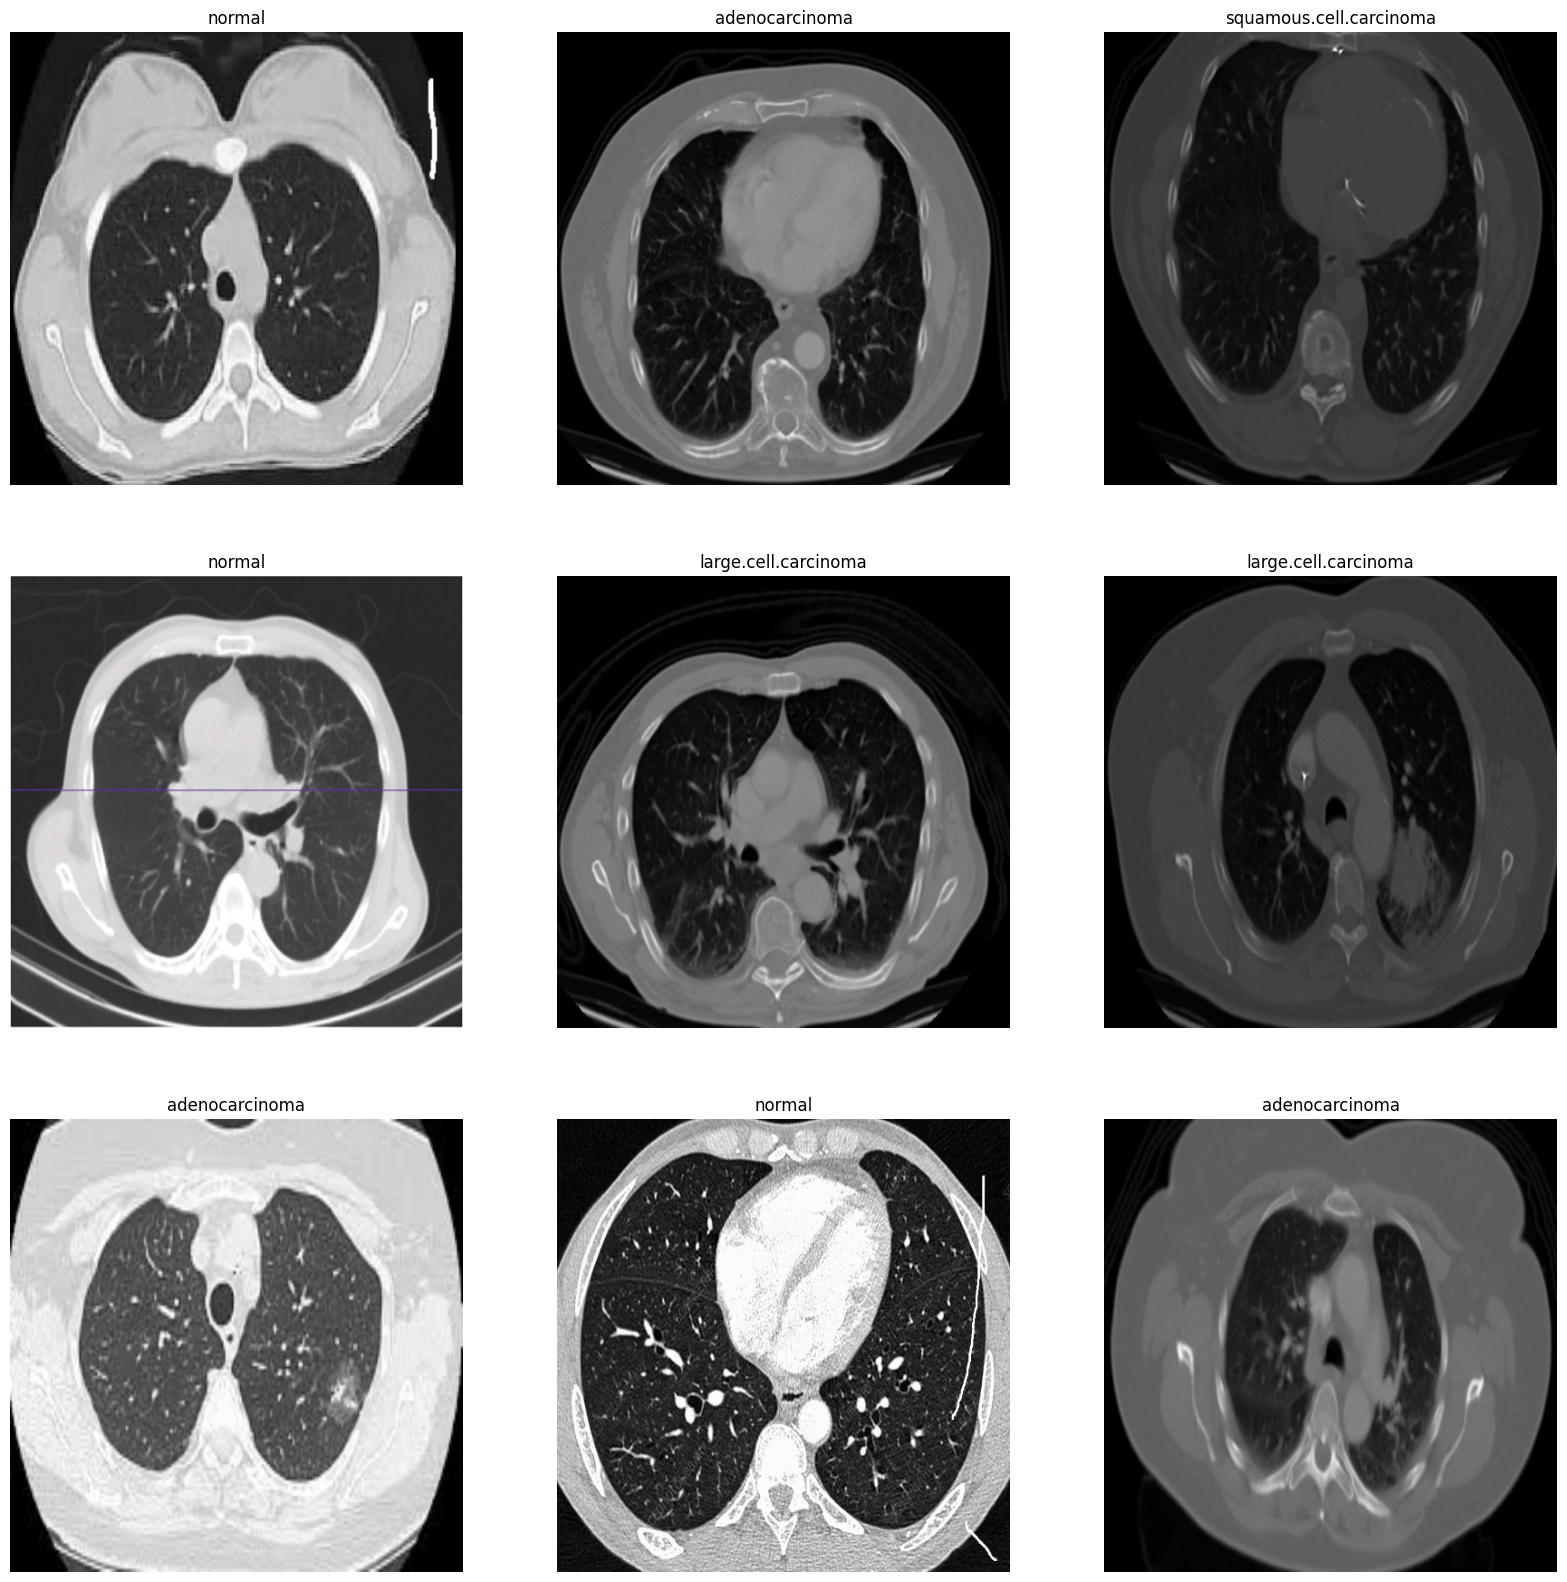

In [ ]:
class_names = ['adenocarcinoma', 'large.cell.carcinoma', 'normal', 'squamous.cell.carcinoma']

import matplotlib.pyplot as plt #Import matplot para graficar

plt.figure(figsize=(20,20))
for images, labels in train_images.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(500, 500, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 498, 498, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 249, 249, 32)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 247, 247, 64)      18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 123, 123, 64)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 121, 121, 64)      36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-trai

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 498, 498, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 249, 249, 32)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 247, 247, 64)      18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 123, 123, 64)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 121, 121, 64)      36928     
                                                                 
 flatten_2 (Flatten)         (None, 937024)           

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
epochs=4
history = model.fit(
    train_images,
    validation_data=test_images,
    epochs=epochs
)
     

Epoch 1/4
16/16 [==============================] - 315s 20s/step - loss: 0.3439 - accuracy: 0.9104 - val_loss: 2.5308 - val_accuracy: 0.4444
Epoch 2/4
16/16 [==============================] - 297s 18s/step - loss: 0.0610 - accuracy: 0.9878 - val_loss: 4.9482 - val_accuracy: 0.3810
Epoch 3/4
16/16 [==============================] - 299s 19s/step - loss: 0.0176 - accuracy: 0.9959 - val_loss: 5.0342 - val_accuracy: 0.3651
Epoch 4/4
16/16 [==============================] - 302s 19s/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 6.3802 - val_accuracy: 0.3968


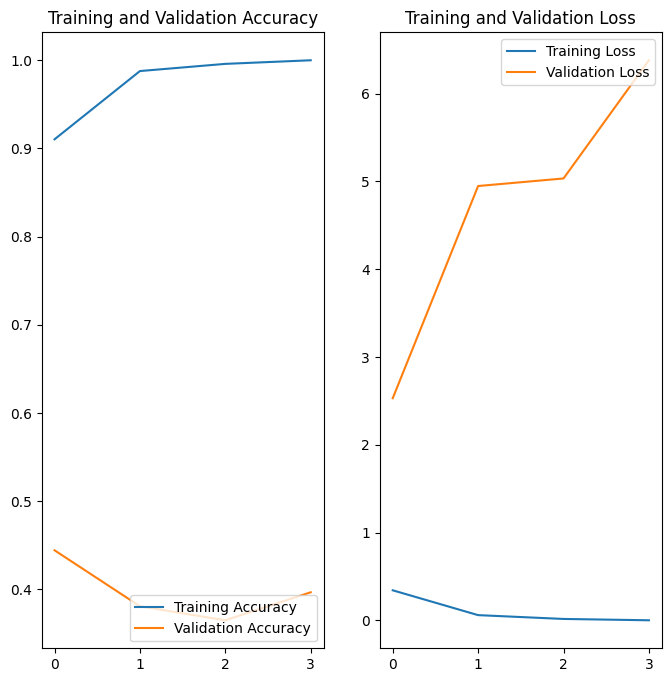

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label= 'Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
predictions = model.predict(test_images)
predictions[0]
np.argmax(predictions[0])
test_labels[0]

2/2 [==============================] - 11s 4s/step


'adenocarcinoma'

In [ ]:
#Se le dice a la red que haga una predicción para ver el entrenamiento previo en acción
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')
 

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

In [ ]:
num_rows = 5
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()